## KDE 그래프를 그리고 저장하는 코드.

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import product
from scipy import stats

In [42]:
# # csv 파일 경로 지정 및 kde 그래프 저장할 경로 지정.
# csv_path = "./meat_dataset/deeplant_SKU_ex.csv" # 여기 지정 1 
# save_path = "./meat_dataset/ku_KDE" # 여기 지정 2
# df = pd.read_csv(csv_path)

In [46]:
def grade_to_number(grade):
    grade_map = {'등심1++': 111, '등심1+': 11, '등심1': 1, '등심2':2, '등심3': 3}
    return grade_map.get(grade, 0)  # 매핑되지 않는 등급은 0으로 처리

# csv 파일 경로 지정 및 kde 그래프 저장할 경로 지정.
csv_path = "../dataset/default_1213_fixed.csv"
save_path = "../dataset/ku_kde_norm_1213"

# grade 열을 숫자로 변환하면서 CSV 파일 읽기
df = pd.read_csv(csv_path, converters={'grade': grade_to_number})

In [47]:

criterion_column = ['grade'] # 세부 분류 기준 column. -> 여기 지정 3
target_columns = ['Marbling','Color','Texture','Surface_Moisture','Total'] # 주요 분류 기준 column. -> 여기 지정 4

# ex 등급 별 마블링 kde 그래프
# criterion_column = ['grade']
# target_columns = ['Marbling']

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def _save_y_values(save_path, filename, y_values):
    """y 값 저장 함수"""
    filepath = os.path.join(save_path, f"{filename}.npy")
    np.save(filepath, y_values)

def _no_criterion(df, target_columns, save_path='./ku_KDE/graph_picture'):
    for t in target_columns:
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # KDE 계산
        data = df[t].dropna()
        kde = stats.gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 100)  # X 범위
        y_kde = kde(x_range)  # Y 값 계산
        
        # Y 값 저장
        _save_y_values(save_path, f'kde_{t}', y_kde)
        
        # 그래프 그리기
        ax.plot(x_range, y_kde)
        ax.fill_between(x_range, y_kde, alpha=0.5)

        # 장식 제거
        ax.axis('off')

        # 그래프 출력
        plt.show()

        # 그래프 저장
        fig.savefig(
            os.path.join(save_path, f'kde_{t}.png'), 
            bbox_inches='tight', pad_inches=0
        )
        plt.close(fig)

def _criterion(df, criterion_column, target_columns, save_path='./ku_KDE/graph_picture'):
    grade_order = [111, 11, 1, 2, 3]
    unique_values = [value for value in grade_order if value in df[criterion_column[0]].unique()]

    for t in target_columns:
        global_max = 0
        kde_results = {}

        for value in unique_values:
            c_df = df[df[criterion_column[0]] == value]
            data = c_df[t].dropna()
            kde = stats.gaussian_kde(data)
            x_range = np.linspace(2, 10, 128)  # X 범위 고정
            y_kde = kde(x_range)  # Y 값 계산
            
            # Y 값 저장
            grade_label = '1++' if value == 111 else ('1+' if value == 11 else str(value))
            _save_y_values(save_path, f'kde_{t}_{grade_label}_grade', y_kde)

            kde_results[value] = y_kde
            global_max = max(global_max, y_kde.max())

        # 그래프 생성
        fig, axs = plt.subplots(1, len(unique_values), figsize=(25, 5))
        fig.suptitle(f'Density Plot of {t}', fontsize=16)

        for idx, value in enumerate(unique_values):
            y_kde = kde_results[value]

            ax = axs[idx] if len(unique_values) > 1 else axs
            ax.plot(x_range, y_kde)
            ax.fill_between(x_range, y_kde, alpha=0.5)

            ax.axis('off')
            ax.set_xlim(2, 10)
            ax.set_ylim(0, global_max * 1.1)

        plt.tight_layout()
        plt.show()

        #fig.savefig(
        #    os.path.join(save_path, f'kde_{t}_grades.png'), 
        #    bbox_inches='tight', pad_inches=0
        #)
        plt.close(fig)

def drawKDE(df, criterion_column, target_columns, save_path='./ku_KDE/graph_picture'):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    if criterion_column is None:
        _no_criterion(df, target_columns, save_path)
    else:
        _criterion(df, criterion_column, target_columns, save_path)

# Y 값 불러오기 함수
def load_y_values(save_path, filename):
    filepath = os.path.join(save_path, f"{filename}.npy")
    return np.load(filepath)


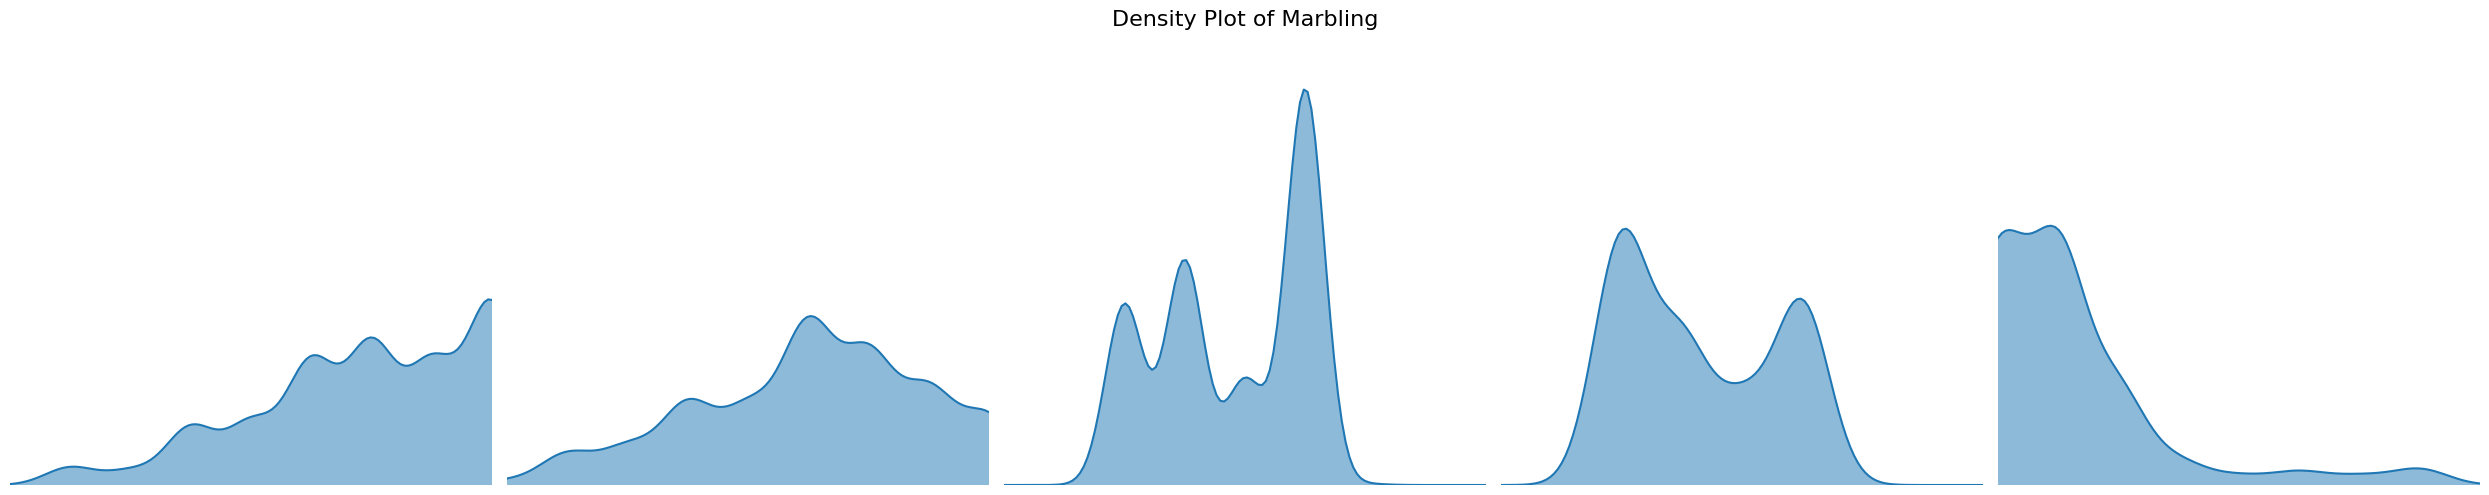

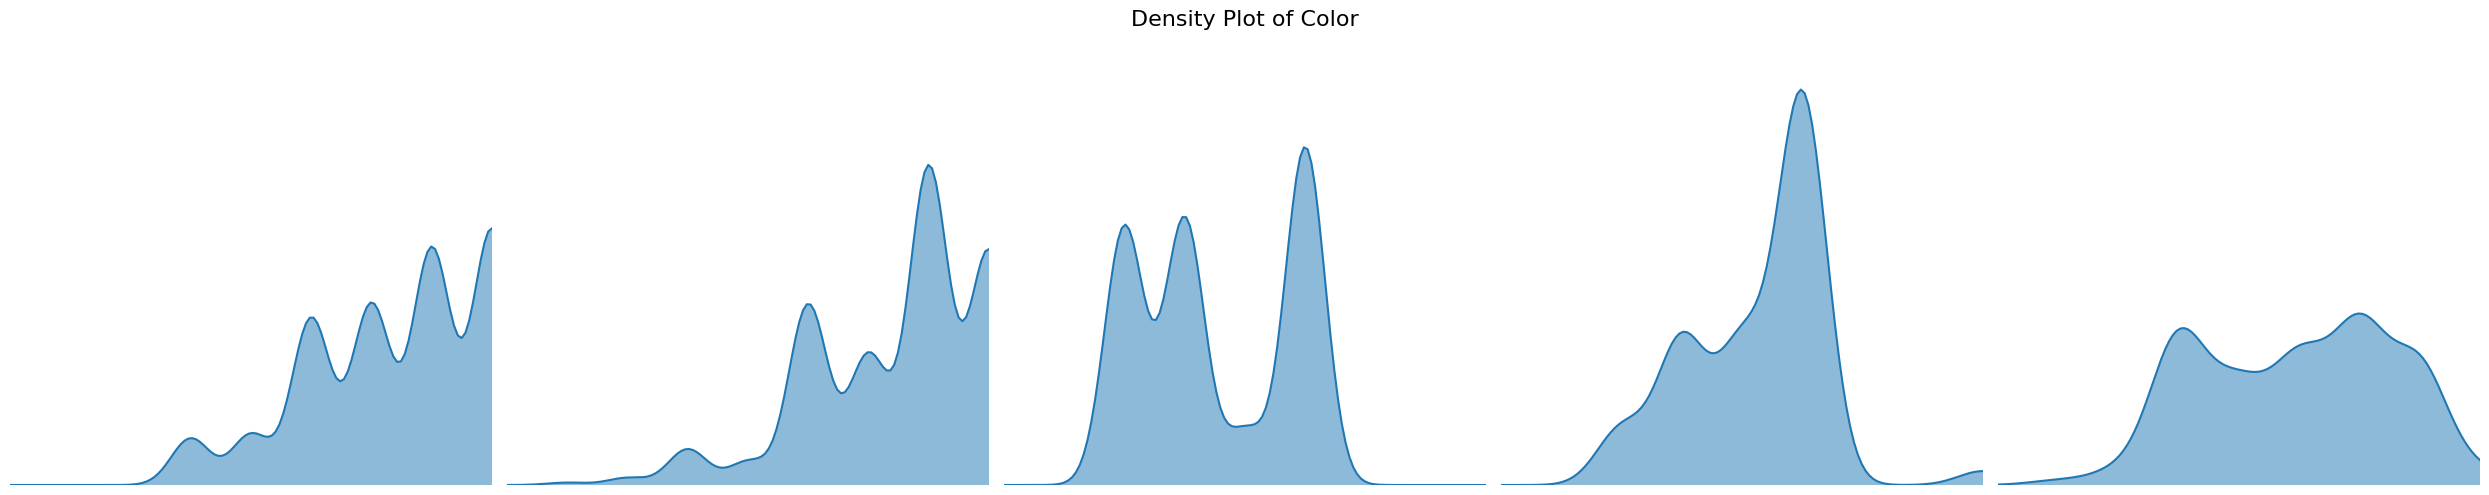

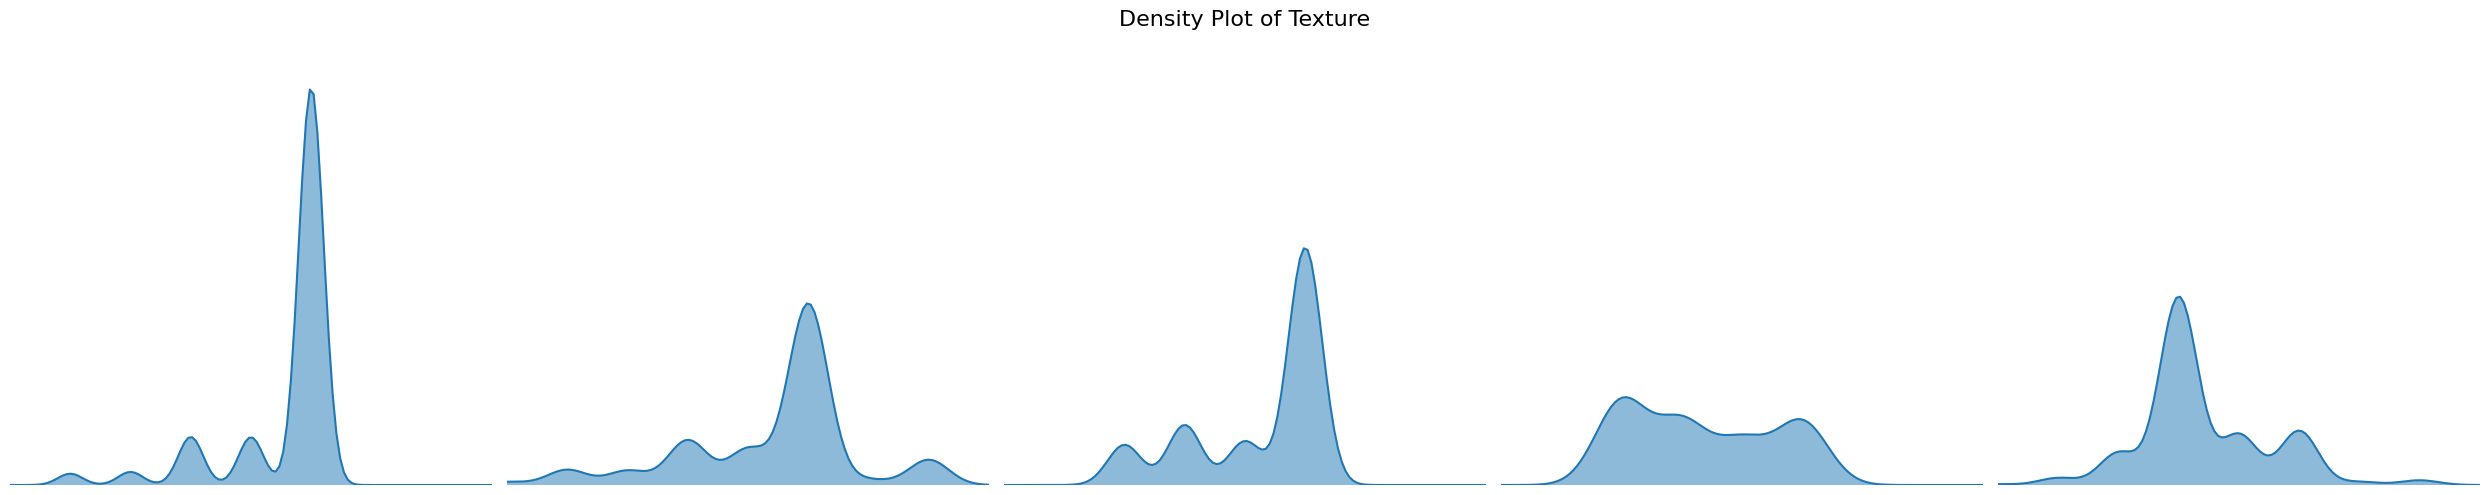

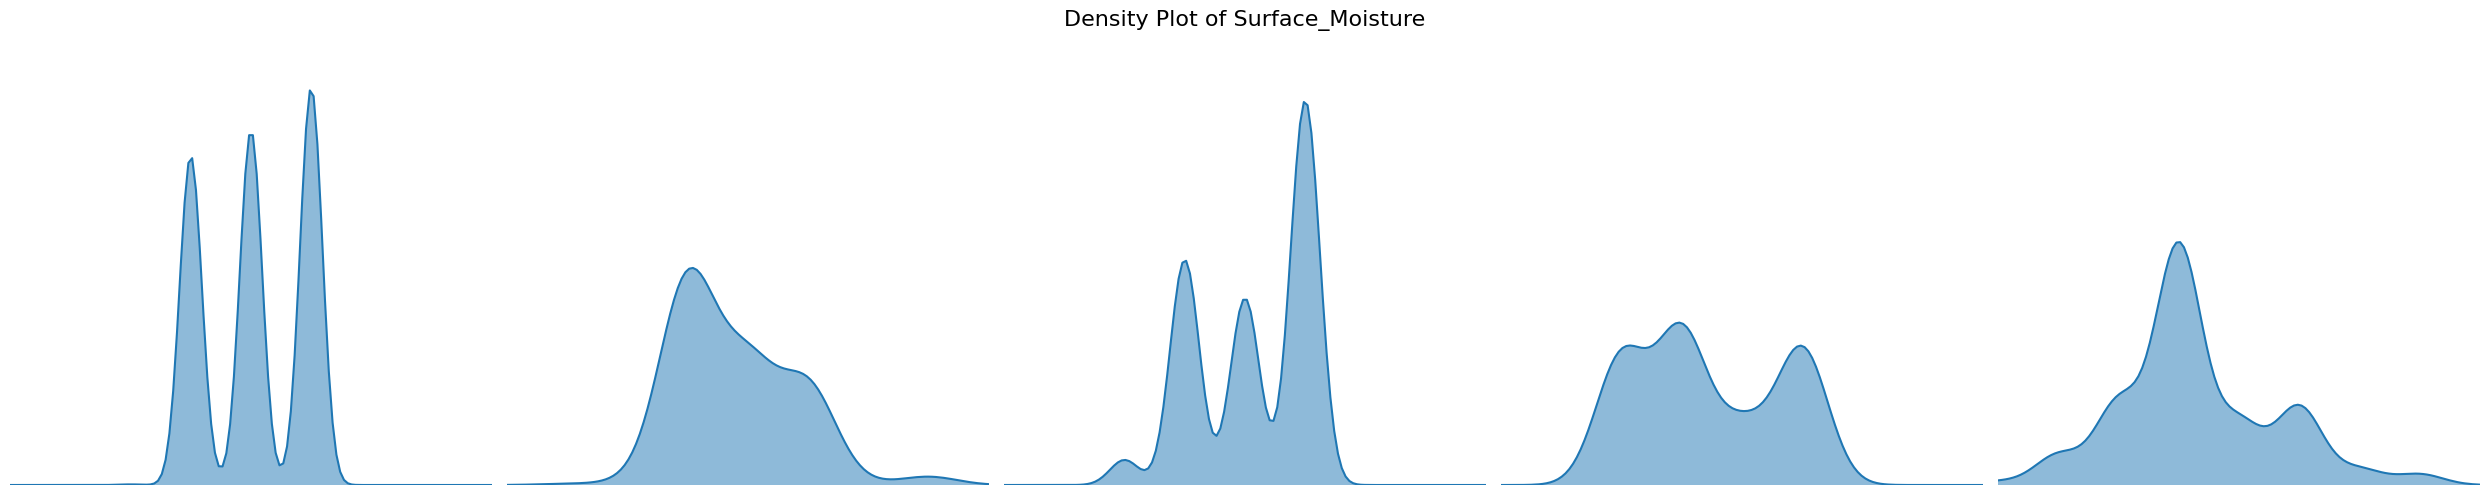

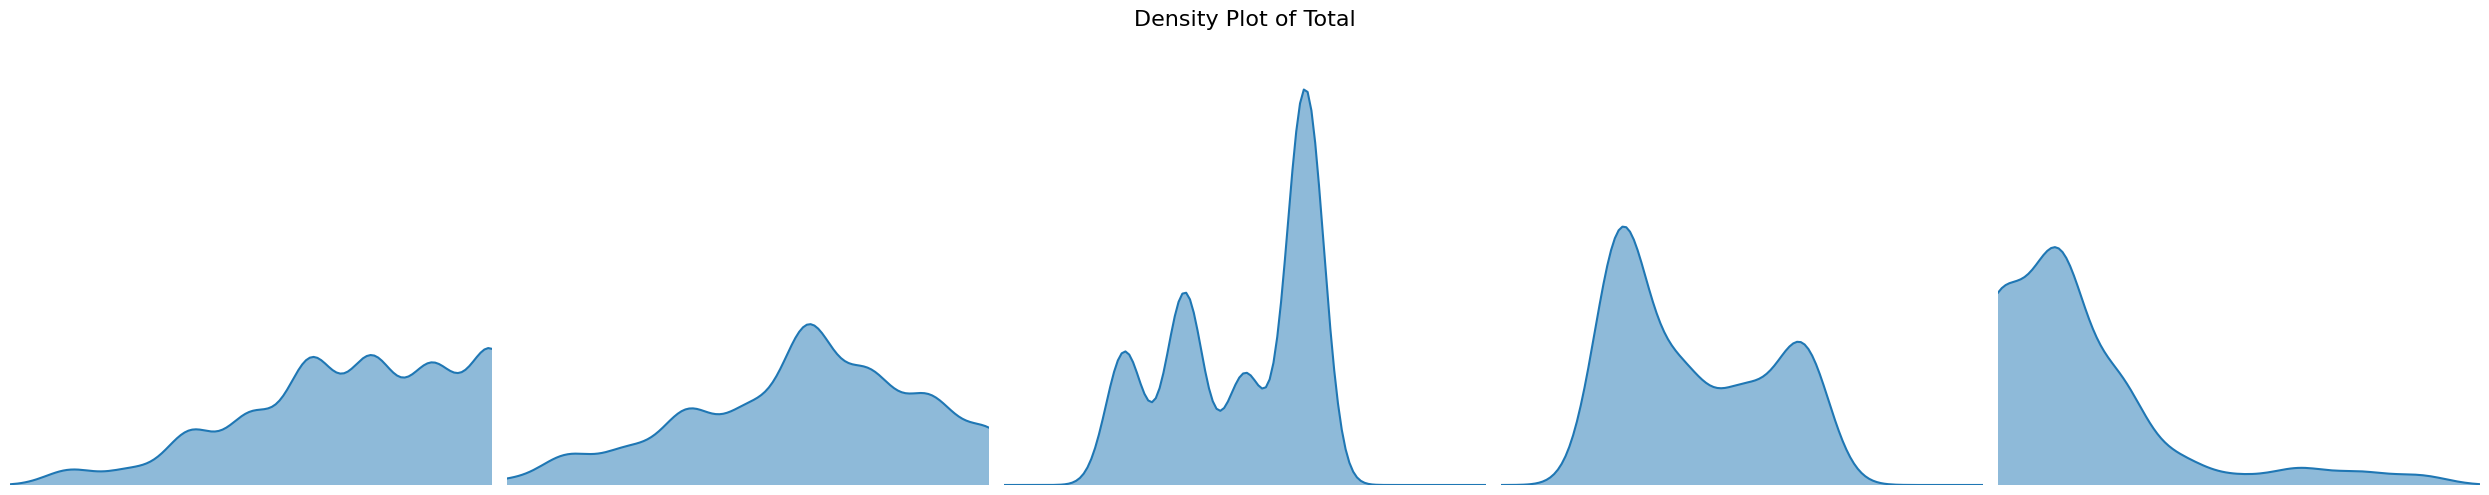

In [49]:
if not os.path.exists(save_path):
    os.makedirs(save_path)
drawKDE(df, criterion_column, target_columns, save_path=save_path)

In [50]:
y_values = load_y_values(save_path, 'kde_Color_1++_grade')
print(y_values)  # y 값 배열 출력

[9.49867771e-21 5.74649962e-20 3.34622361e-19 1.87550353e-18
 1.01179414e-17 5.25385135e-17 2.62587924e-16 1.26323185e-15
 5.84928433e-15 2.60695627e-14 1.11834579e-13 4.61774361e-13
 1.83524848e-12 7.02055227e-12 2.58499097e-11 9.16132163e-11
 3.12513353e-10 1.02610162e-09 3.24282505e-09 9.86433952e-09
 2.88817731e-08 8.13937467e-08 2.20785006e-07 5.76447103e-07
 1.44864074e-06 3.50407405e-06 8.15825370e-06 1.82823698e-05
 3.94347529e-05 8.18723236e-05 1.63608731e-04 3.14693096e-04
 5.82611916e-04 1.03820465e-03 1.78073022e-03 2.93984888e-03
 4.67158137e-03 7.14521715e-03 1.05191487e-02 1.49060070e-02
 2.03311119e-02 2.66923292e-02 3.37325494e-02 4.10365532e-02
 4.80608343e-02 5.41979856e-02 5.88680068e-02 6.16201019e-02
 6.22233074e-02 6.07247913e-02 5.74611589e-02 5.30186811e-02
 4.81496749e-02 4.36609587e-02 4.02942920e-02 3.86179603e-02
 3.89447410e-02 4.12865200e-02 4.53512573e-02 5.05840195e-02
 5.62495815e-02 6.15488463e-02 6.57551543e-02 6.83508851e-02
 6.91417294e-02 6.832734

In [51]:
"""
각 라벨의 각 등급별로 mean과 std를 구해서 normalize
모든 kde 값에 대해 normalize: 총 25번 normalize
"""

import os
import numpy as np

def normalize_and_save_npy_files(directory_path):
    """
    경로에 있는 모든 .npy 파일을 불러와 정규화(mean, std 사용)한 뒤 동일한 파일에 다시 저장.

    Parameters:
    directory_path (str): .npy 파일이 저장된 디렉토리 경로
    """
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory {directory_path} does not exist.")

    # 디렉토리 내 모든 파일 탐색
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.npy'):
            file_path = os.path.join(directory_path, file_name)
            
            # .npy 파일 불러오기
            data = np.load(file_path)
            
            # 평균과 표준편차 계산
            mean = np.mean(data)
            std = np.std(data)

            if std == 0:
                print(f"Skipping file {file_name} as it has zero standard deviation.")
                continue

            # 정규화
            normalized_data = (data - mean) / std

            # 동일한 파일에 다시 저장
            np.save(file_path, normalized_data)
            print(f"Normalized and saved: {file_name}")

# 사용 예시
directory_path = '../dataset/ku_kde_norm_1213'  # .npy 파일이 있는 폴더 경로
normalize_and_save_npy_files(directory_path)


Normalized and saved: kde_Marbling_1++_grade.npy
Normalized and saved: kde_Marbling_1+_grade.npy
Normalized and saved: kde_Marbling_1_grade.npy
Normalized and saved: kde_Marbling_2_grade.npy
Normalized and saved: kde_Marbling_3_grade.npy
Normalized and saved: kde_Color_1++_grade.npy
Normalized and saved: kde_Color_1+_grade.npy
Normalized and saved: kde_Color_1_grade.npy
Normalized and saved: kde_Color_2_grade.npy
Normalized and saved: kde_Color_3_grade.npy
Normalized and saved: kde_Texture_1++_grade.npy
Normalized and saved: kde_Texture_1+_grade.npy
Normalized and saved: kde_Texture_1_grade.npy
Normalized and saved: kde_Texture_2_grade.npy
Normalized and saved: kde_Texture_3_grade.npy
Normalized and saved: kde_Surface_Moisture_1++_grade.npy
Normalized and saved: kde_Surface_Moisture_1+_grade.npy
Normalized and saved: kde_Surface_Moisture_1_grade.npy
Normalized and saved: kde_Surface_Moisture_2_grade.npy
Normalized and saved: kde_Surface_Moisture_3_grade.npy
Normalized and saved: kde_To

In [24]:
"""
각 등급별로 모든 라벨의 KDE 값을 통합하여 mean과 std를 구해서 normalize
등급 기준으로 normalize 수행
"""

import os
import numpy as np

def normalize_and_save_npy_files_by_grade(directory_path):
    """
    경로에 있는 모든 .npy 파일을 불러와 등급 기준으로 정규화(mean, std 사용)한 뒤 동일한 파일에 다시 저장.

    Parameters:
    directory_path (str): .npy 파일이 저장된 디렉토리 경로
    """
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory {directory_path} does not exist.")

    # 등급별 데이터를 저장할 딕셔너리
    grade_data = {}

    # 디렉토리 내 모든 파일 탐색
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.npy'):
            file_path = os.path.join(directory_path, file_name)

            # 파일 이름에서 등급 추출 (예: "kde_label_grade.npy"에서 "grade" 추출)
            grade = file_name.split('_')[-2]  # 등급이 파일명에서 두 번째 위치에 있다고 가정

            # .npy 파일 불러오기
            data = np.load(file_path)

            # 등급별로 데이터를 모음
            if grade not in grade_data:
                grade_data[grade] = []
            grade_data[grade].append((file_path, data))

    # 등급 기준 Normalize 수행
    for grade, files_data in grade_data.items():
        # 모든 라벨의 데이터를 통합하여 mean과 std 계산
        all_data = np.concatenate([data for _, data in files_data])
        mean = np.mean(all_data)
        std = np.std(all_data)

        if std == 0:
            print(f"Skipping grade {grade} as it has zero standard deviation.")
            continue

        # 각 파일별로 Normalize 및 저장
        for file_path, data in files_data:
            normalized_data = (data - mean) / std
            np.save(file_path, normalized_data)
            print(f"Normalized and saved: {file_path}")

# 사용 예시
directory_path = '../dataset/ku_kde2_grade_norm'  # .npy 파일이 있는 폴더 경로
normalize_and_save_npy_files_by_grade(directory_path)


Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Marbling_1++_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Total_1++_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Color_1++_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Texture_1++_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Surface_Moisture_1++_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Marbling_1+_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Color_1+_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Texture_1+_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Surface_Moisture_1+_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Total_1+_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Marbling_1_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Color_1_grade.npy
Normalized and saved: ../dataset/ku_kde2_grade_norm/kde_Textur

In [39]:
import os
import numpy as np

def normalize_and_save_npy_files_globally(directory_path):
    """
    경로에 있는 모든 .npy 파일을 불러와 전체 데이터를 통합(mean, std 계산)한 뒤,
    모든 파일을 동일한 mean, std로 Normalize하여 다시 저장합니다.

    Parameters:
    directory_path (str): .npy 파일이 저장된 디렉토리 경로
    """
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory {directory_path} does not exist.")

    # 디렉토리 내 .npy 파일 경로들을 모읍니다.
    npy_files = [
        os.path.join(directory_path, f) 
        for f in os.listdir(directory_path) 
        if f.endswith('.npy')
    ]

    if len(npy_files) == 0:
        print("No .npy files found in the directory.")
        return

    # 모든 파일 데이터를 하나로 통합
    all_data = []
    for file_path in npy_files:
        data = np.load(file_path)
        all_data.append(data)
    
    # 전체 데이터 통합 (1차원으로 변환하여 붙여도 되고, 차원을 유지해도 상관없음)
    all_data = np.concatenate(all_data, axis=None)
    
    # 전체 mean, std 계산
    mean = np.mean(all_data)
    std = np.std(all_data)

    if std == 0:
        print("Skipping normalization because the standard deviation is zero for all data.")
        return

    # 각 파일별로 Normalize
    for file_path in npy_files:
        data = np.load(file_path)
        normalized_data = (data - mean) / std
        np.save(file_path, normalized_data)
        print(f"Normalized and saved: {file_path}")

# 사용 예시
directory_path = '../dataset/ku_kde2_all_norm'  # .npy 파일이 있는 폴더 경로
normalize_and_save_npy_files_globally(directory_path)


Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Marbling_1++_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Marbling_1+_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Marbling_1_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Marbling_2_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Marbling_3_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Color_1++_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Color_1+_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Color_1_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Color_2_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Color_3_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Texture_1++_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Texture_1+_grade.npy
Normalized and saved: ../dataset/ku_kde2_all_norm/kde_Texture_1_grade.npy
Normalized and saved: ../dataset/k